# 1. Estágio Um – Determinar os Objetivos de Negócios e Avaliar a Situação

#### Estimativa de Preços de Imóveis: O objetivo principal é desenvolver um modelo preditivo que estime com precisão os preços de imóveis com base em uma série de características disponíveis no conjunto de dados (como tamanho, localização, número de quartos, etc.).
#### Apoio à Tomada de Decisões: Outro objetivo é fornecer insights para profissionais do setor imobiliário, como corretores e desenvolvedores, ajudando-os a precificar imóveis de forma competitiva ou identificar fatores que mais influenciam o valor das propriedades.

## 1.1 Avaliação da situação atual

### 1.1.1. Inventário e recursos
- Cientista de dados:
  * Lucas Guimarães Cardoso, Talles Henrique Nadiceo e Pedro Henrique Nunes Boaventura
- Dataset:
  * House Prices - Advanced Regression Techniques
- Recursos de computação:

  * Google Colab

- Software:
  * Python


### 1.1.2. Requisitos, suposições e restrições
- A data final para entrega do projeto foi definida como o dia 31 de agosto de 2024.
- O projeto deve seguir a metodologia de projeto CRISP-DM para garantir a qualidade e integridade dos resultados.
- O dataset em questão está disponível publicamente e não está sendo usado de forma comercial.
- Vamos assumir que os dados foram amostrados de maneira imparcial e respondidos honestamente pelos passageiros.
- Não temos acesso ao time que realizou a coleta dos dados para validar qualidade da amostragem.


### 1.1.4 Terminologia

## Colunas da Base de Dados:

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale

 ## 1.2 Objetivos desejados do projeto


**Critério de sucesso**  
  * Criar um modelo preditivo com o melhor Root-Mean-Squared-Error (RMSE)
    * Visando o objetivo futuro de identificar o preço de uma casa.

**Plano do projeto**  
  * Determinar os Objetivos de Negócios e Avaliar a Situação
  * Compreensão dos Dados
  * Preparação dos dados
  * Modelagem
  * Implementação em API



# 2. Estágio Dois – Compreensão dos Dados



## 2.1 Relatório inicial dos dados

Link para a base de dados escolhida:  
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

Estes estão disponíveis públicamente na plataforma Kaggle.
Este download retorna uma pasta compactada chamada *house-prices-advanced-regression-techniques*, contendo os arquivos de train, teste e submission (caso queira participar da competição no Kaggle)

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Iremos utilizar os dados de treino para analisar e tratar
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
# Mostrando todas as colunas
pd.set_option('display.max_columns',500)
# Relatório inicial
print(f"Número de Linhas: {df_train.shape[0]}")
print(f"Número de Colunas: {df_train.shape[1]}")

print('\nPrimeiras 5 linhas')
df_train.head(5)

Número de Linhas: 1460
Número de Colunas: 81

Primeiras 5 linhas


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2.2 Descrição dos Dados

Demonstrando colunas e tipos, alem das métricas de cada coluna.

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


## 2.3 Verificar a qualidade dos dados



### 2.3.1. Dados Faltantes
Analisando os dados faltantes percebemos que mais de 90% das casas não possuem os dados de piscina preenchido (qual a qualidade e se existe ou não piscina, como pode ser na Terminologia no 1.1.4), os dados de Miscellaneous (features que não possuem uma categoria) e alley (se possue ou não acesso a um beco). Alem destas colunas, vemos um consideravel número de nulos nas colunas de LotFrontage, FireplaceQu, MasVnrType e Fence.

In [ ]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [ ]:
print(missing_values_table(df_train))

Your selected dataframe has 81 columns.
There are 19 columns that have missing values.
              Missing Values  % of Total Values
PoolQC                  1453               99.5
MiscFeature             1406               96.3
Alley                   1369               93.8
Fence                   1179               80.8
MasVnrType               872               59.7
FireplaceQu              690               47.3
LotFrontage              259               17.7
GarageType                81                5.5
GarageYrBlt               81                5.5
GarageFinish              81                5.5
GarageQual                81                5.5
GarageCond                81                5.5
BsmtFinType2              38                2.6
BsmtExposure              38                2.6
BsmtFinType1              37                2.5
BsmtCond                  37                2.5
BsmtQual                  37                2.5
MasVnrArea                 8                0.5
E

In [ ]:
# Pelo alto de número de nulos, iremos remover as colunas com nulos acima de 40%
df_train_filtrado = df_train.copy()
df_train_filtrado = df_train_filtrado.drop(['FireplaceQu','MasVnrType','Fence','Alley','MiscFeature','PoolQC'],axis=1)

df_test_filtrado = df_test.copy()
df_test_filtrado = df_test_filtrado.drop(['FireplaceQu','MasVnrType','Fence','Alley','MiscFeature','PoolQC'],axis=1)

In [ ]:
# No restante iremos dividir em númericos e categoricos
colunas_nulas = ['LotFrontage', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
                      'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond',
                      'BsmtFinType1', 'MasVnrArea', 'Electrical']
# Verificando o tipo de dados dessas colunas
data_types = df_train_filtrado[colunas_nulas].dtypes
print(data_types)

LotFrontage     float64
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
BsmtExposure     object
BsmtFinType2     object
BsmtQual         object
BsmtCond         object
BsmtFinType1     object
MasVnrArea      float64
Electrical       object
dtype: object


In [ ]:
# Apos verificar, iremos substituir pela moda os valores nulos das colunas categoricas e pela média pra os numericos.

# Substituir valores nulos nas colunas do tipo object pela moda
for column in df_train_filtrado.select_dtypes(include=['object']).columns:
    mode_value = df_train_filtrado[column].mode()[0]
    df_train_filtrado[column].fillna(mode_value, inplace=True)

# Substituir valores nulos nas colunas numéricas pela média
for column in df_train_filtrado.select_dtypes(include=['float64']).columns:
    mean_value = df_train_filtrado[column].mean()
    df_train_filtrado[column].fillna(mean_value, inplace=True)


# Apos verificar, iremos substituir pela moda os valores nulos das colunas categoricas e pela média pra os numericos.

# Substituir valores nulos nas colunas do tipo object pela moda
for column in df_test_filtrado.select_dtypes(include=['object']).columns:
    mode_value = df_test_filtrado[column].mode()[0]
    df_test_filtrado[column].fillna(mode_value, inplace=True)

# Substituir valores nulos nas colunas numéricas pela média
for column in df_test_filtrado.select_dtypes(include=['float64']).columns:
    mean_value = df_test_filtrado[column].mean()
    df_test_filtrado[column].fillna(mean_value, inplace=True)

In [ ]:
# Verificando novamente os nulos
print(missing_values_table(df_train_filtrado))

# Verificando novamente os nulos
print(missing_values_table(df_test_filtrado))

Your selected dataframe has 75 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []
Your selected dataframe has 74 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


Como neste dataframe temos muitas colunas muito parecidas (que praticamente significam a mesma coisa) iremos fazer transformações

In [ ]:
# Combinar Exterior1st e Exterior2nd
df_train_filtrado['ExteriorCombined'] = df_train_filtrado['Exterior1st'] + '/' + df_train_filtrado['Exterior2nd']
df_train_filtrado.drop(['Exterior1st', 'Exterior2nd'], axis=1, inplace=True)

# Combinar Condition1 e Condition2
df_train_filtrado['ConditionCombined'] = df_train_filtrado['Condition1'] + '/' + df_train_filtrado['Condition2']
df_train_filtrado.drop(['Condition1', 'Condition2'], axis=1, inplace=True)

# Somar BsmtFinSF1, BsmtFinSF2 e BsmtUnfSF em uma única coluna
df_train_filtrado['TotalBsmtFinSF'] = df_train_filtrado['BsmtFinSF1'] + df_train_filtrado['BsmtFinSF2'] + df_train_filtrado['BsmtUnfSF']
df_train_filtrado.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis=1, inplace=True)

# Somar 1stFlrSF e 2ndFlrSF em uma única coluna
df_train_filtrado['TotalFlrSF'] = df_train_filtrado['1stFlrSF'] + df_train_filtrado['2ndFlrSF']
df_train_filtrado.drop(['1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)

# Criar uma nova coluna que soma FullBath e HalfBath (ponderando HalfBath como 0.5)
df_train_filtrado['TotalBath'] = df_train_filtrado['FullBath'] + df_train_filtrado['HalfBath'] * 0.5
df_train_filtrado.drop(['FullBath', 'HalfBath'], axis=1, inplace=True)

# Criar uma nova coluna que soma BsmtFullBath e BsmtHalfBath (ponderando BsmtHalfBath como 0.5)
df_train_filtrado['TotalBsmtBath'] = df_train_filtrado['BsmtFullBath'] + df_train_filtrado['BsmtHalfBath'] * 0.5
df_train_filtrado.drop(['BsmtFullBath', 'BsmtHalfBath'], axis=1, inplace=True)

# Aqui vamos manter apenas GarageArea e remover GarageCars
df_train_filtrado.drop(['GarageCars'], axis=1, inplace=True)

# Combinar WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch em uma única coluna de área externa total
df_train_filtrado['TotalPorchSF'] = df_train_filtrado['WoodDeckSF'] + df_train_filtrado['OpenPorchSF'] + df_train_filtrado['EnclosedPorch'] + df_train_filtrado['3SsnPorch'] + df_train_filtrado['ScreenPorch']
df_train_filtrado.drop(['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis=1, inplace=True)

In [ ]:
# Combinar Exterior1st e Exterior2nd
df_test_filtrado['ExteriorCombined'] = df_test_filtrado['Exterior1st'] + '/' + df_test_filtrado['Exterior2nd']
df_test_filtrado.drop(['Exterior1st', 'Exterior2nd'], axis=1, inplace=True)

# Combinar Condition1 e Condition2
df_test_filtrado['ConditionCombined'] = df_test_filtrado['Condition1'] + '/' + df_test_filtrado['Condition2']
df_test_filtrado.drop(['Condition1', 'Condition2'], axis=1, inplace=True)

# Somar BsmtFinSF1, BsmtFinSF2 e BsmtUnfSF em uma única coluna
df_test_filtrado['TotalBsmtFinSF'] = df_test_filtrado['BsmtFinSF1'] + df_test_filtrado['BsmtFinSF2'] + df_test_filtrado['BsmtUnfSF']
df_test_filtrado.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis=1, inplace=True)

# Somar 1stFlrSF e 2ndFlrSF em uma única coluna
df_test_filtrado['TotalFlrSF'] = df_test_filtrado['1stFlrSF'] + df_test_filtrado['2ndFlrSF']
df_test_filtrado.drop(['1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)

# Criar uma nova coluna que soma FullBath e HalfBath (ponderando HalfBath como 0.5)
df_test_filtrado['TotalBath'] = df_test_filtrado['FullBath'] + df_test_filtrado['HalfBath'] * 0.5
df_test_filtrado.drop(['FullBath', 'HalfBath'], axis=1, inplace=True)

# Criar uma nova coluna que soma BsmtFullBath e BsmtHalfBath (ponderando BsmtHalfBath como 0.5)
df_test_filtrado['TotalBsmtBath'] = df_test_filtrado['BsmtFullBath'] + df_test_filtrado['BsmtHalfBath'] * 0.5
df_test_filtrado.drop(['BsmtFullBath', 'BsmtHalfBath'], axis=1, inplace=True)

# Aqui vamos manter apenas GarageArea e remover GarageCars
df_test_filtrado.drop(['GarageCars'], axis=1, inplace=True)

# Combinar WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch em uma única coluna de área externa total
df_test_filtrado['TotalPorchSF'] = df_test_filtrado['WoodDeckSF'] + df_test_filtrado['OpenPorchSF'] + df_test_filtrado['EnclosedPorch'] + df_test_filtrado['3SsnPorch'] + df_test_filtrado['ScreenPorch']
df_test_filtrado.drop(['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis=1, inplace=True)

In [ ]:
df_train_filtrado.shape

(1460, 63)

In [ ]:
df_test_filtrado.shape

(1459, 62)

### 2.3.2. Outliers <a class="anchor" id="Outliers"></a>
Pelo alto numero de outliers, vamos ter dois dataframes, um com eles removidos e um contendo todos, para visualizar o impacto no modelo.

In [ ]:
def find_outliers(df, fence=3):
    outliers_set = set()

    for i in df:
        if df[i].dtype != 'O':  # Ignora colunas não numéricas
            q1 = df[i].quantile(.25)
            q3 = df[i].quantile(.75)
            delta = q3 - q1
            li = q1 - fence * delta
            ls = q3 + fence * delta

            # Encontrar índices de outliers
            outliers_df = df[(df[i] < li) | (df[i] > ls)]
            outliers_set.update(outliers_df.index)

    return outliers_set

# Identificando outliers
outliers_set = find_outliers(df_train_filtrado)

# Criando o DataFrame sem outliers
df_train_filtrado_sem_outlier = df_train_filtrado.drop(outliers_set)


# Identificando outliers
outliers_set_test = find_outliers(df_test_filtrado)

# Criando o DataFrame sem outliers
df_test_filtrado_sem_outlier = df_test_filtrado.drop(outliers_set_test)

In [ ]:
print(f"Total de dados no dataframe original: {len(df_train_filtrado)}")
print(f"Total de dados no dataframe após remover outliers: {len(df_train_filtrado_sem_outlier)}")

print(f"Total de dados no dataframe original: {len(df_test_filtrado)}")
print(f"Total de dados no dataframe após remover outliers: {len(df_test_filtrado_sem_outlier)}")

Total de dados no dataframe original: 1460
Total de dados no dataframe após remover outliers: 1247
Total de dados no dataframe original: 1459
Total de dados no dataframe após remover outliers: 1271


In [ ]:
df_train_filtrado_sem_outlier.shape

(1247, 63)

In [ ]:
df_test_filtrado_sem_outlier.shape

(1271, 62)

## 2.4 Exploração Inicial de Dados

### 2.4.1 Distribuições

##### Vimos que temos praticamente uma distribuição normal na nossa variável alvo, mas com alguns outliers em valores mais altos

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<ipython-input-21-53fd1e86ecc8>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train_filtrado['SalePrice'], color='b', bins=100, hist_kws={'alpha': 0.4});


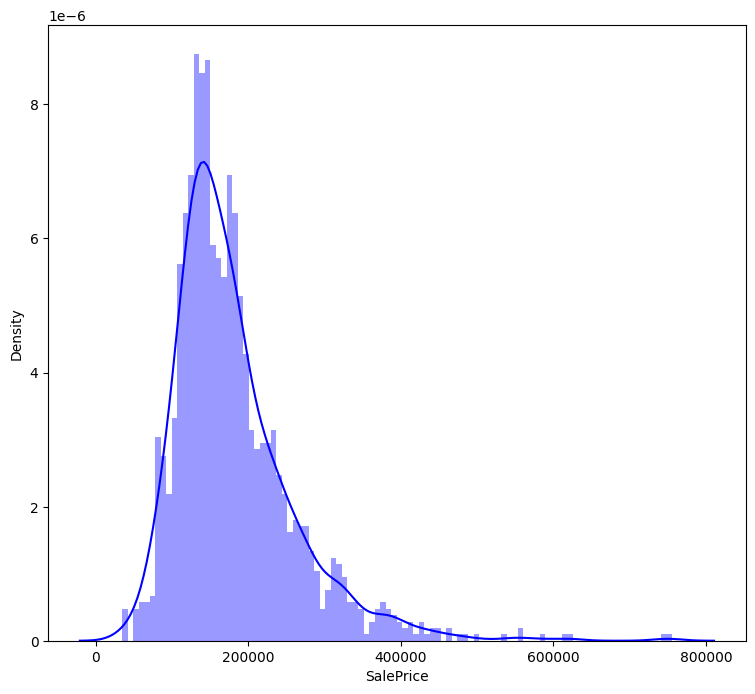

In [ ]:
# Distribuição da coluna alvo

print(df_train_filtrado['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_train_filtrado['SalePrice'], color='b', bins=100, hist_kws={'alpha': 0.4});

##### Utilizando o dataframe sem os outliers, vemos uma distribuição mais igual, estando bastante próxima da normal

count      1247.000000
mean     178034.624699
std       68718.121999
min       34900.000000
25%      130500.000000
50%      165000.000000
75%      213495.000000
max      465000.000000
Name: SalePrice, dtype: float64


<ipython-input-22-fc75a63a27fe>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train_filtrado_sem_outlier['SalePrice'], color='b', bins=100, hist_kws={'alpha': 0.4});


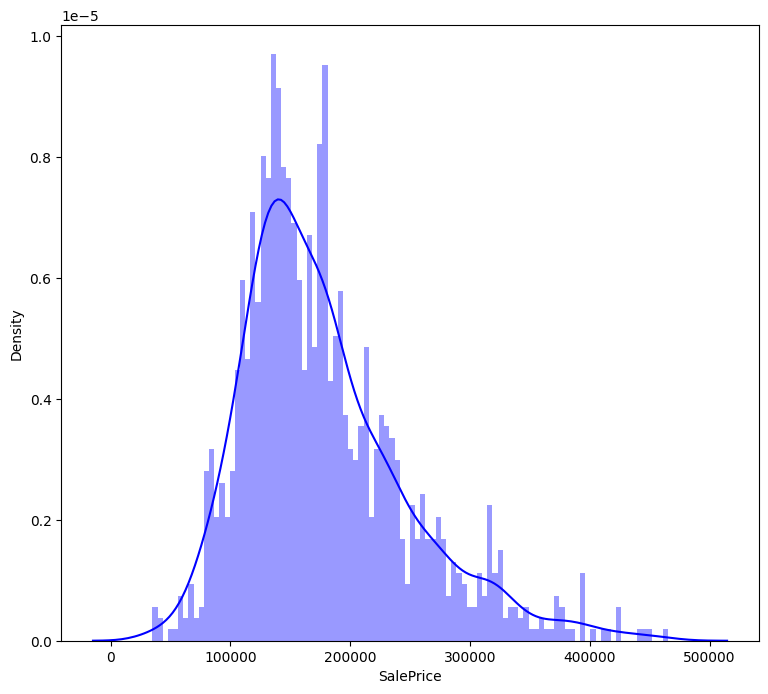

In [ ]:
# Distribuição da coluna alvo

print(df_train_filtrado_sem_outlier['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_train_filtrado_sem_outlier['SalePrice'], color='b', bins=100, hist_kws={'alpha': 0.4});

### 2.4.2 Correlações

Analisando as correlações vimos que OverallQual (qualidade da casa), TotalBsmtSF (total de quartos), GrLivArea, GarageArea (area da garagem), TotalBsmtFinSF (area tota ldo basement) e TotalFlrSF (area total do primeiro e segundo andar) tem uma correlação muito grande com o SalePrice.

In [ ]:
# Vendos a matrix de correlação de todas as colunas númericas
df_train_filtrado.corr(numeric_only=True)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalBsmtFinSF,TotalFlrSF,TotalBath,TotalBsmtBath,TotalPorchSF
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.015415,-0.044230,0.008273,0.037719,0.002951,0.027239,-0.019772,0.000070,0.017634,0.057044,-0.006242,0.021172,0.000712,-0.021917,-0.015415,0.012468,0.007522,-0.002366,-0.031046
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.238518,0.046474,0.074853,-0.023438,0.281721,0.040380,-0.045569,0.080187,-0.098672,0.008283,-0.007683,-0.013585,-0.021407,-0.084284,-0.238518,0.071137,0.184114,0.002977,-0.034807
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.363358,0.036849,0.368392,0.237023,-0.005805,0.320146,0.235755,0.064324,0.323663,0.180868,0.001168,0.010158,0.006768,0.334901,0.363358,0.368006,0.175362,0.090692,0.148725
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.260833,0.004779,0.263116,0.119690,-0.017784,0.190015,0.271364,-0.024812,0.180403,0.077672,0.038068,0.001205,-0.014261,0.263843,0.260833,0.264850,0.114805,0.170501,0.185256
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.537808,-0.030429,0.593007,0.101676,-0.183882,0.427452,0.396765,0.518018,0.562022,0.065166,-0.031406,0.070815,-0.027347,0.790982,0.537808,0.600758,0.585038,0.102640,0.306097
OverallCond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.171098,0.025494,-0.079686,0.012980,-0.087001,-0.057583,-0.023820,-0.306169,-0.151521,-0.001985,0.068777,-0.003511,0.043950,-0.077856,-0.171098,-0.082724,-0.192197,-0.028049,0.035280
YearBuilt,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.391452,-0.183784,0.199010,-0.070651,-0.174800,0.095589,0.147716,0.780555,0.478954,0.004950,-0.034383,0.012398,-0.013618,0.522897,0.391452,0.217805,0.501547,0.180186,0.096577
YearRemodAdd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.291066,-0.062419,0.287389,-0.040581,-0.149598,0.191740,0.112581,0.618130,0.371600,0.005829,-0.010286,0.021490,0.035743,0.507101,0.291066,0.295593,0.452780,0.117523,0.179338
MasVnrArea,-0.050199,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.362452,-0.069068,0.389893,0.102417,-0.037364,0.280027,0.247906,0.249367,0.372567,0.011723,-0.029815,-0.005940,-0.008184,0.475241,0.362452,0.399566,0.318222,0.091887,0.162879
TotalBsmtSF,-0.015415,-0.238518,0.363358,0.260833,0.537808,-0.171098,0.391452,0.291066,0.362452,1.000000,-0.033245,0.454868,0.050450,-0.068901,0.285573,0.339519,0.311700,0.486665,0.126053,-0.018479,0.013196,-0.014969,0.613581,1.000000,0.461738,0.261114,0.309627,0.290030


In [ ]:
# Supondo que 'SalePrice' seja a coluna alvo
target_column = 'SalePrice'

# Calculando a matriz de correlação
correlation_matrix = df_train_filtrado.corr(numeric_only=True)

# Filtrando as correlações com a coluna alvo
target_correlations = correlation_matrix[target_column].abs()

# Selecionando apenas as correlações com valor absoluto maior que 0.6
strong_target_correlations = target_correlations[target_correlations > 0.6]

# Filtrando as correlações negativas com a coluna alvo
negative_correlations = correlation_matrix[target_column][correlation_matrix[target_column] < -0.6]

In [ ]:
# Correlações da coluna alvo
target_correlations

,SalePrice
Id,0.021917
MSSubClass,0.084284
LotFrontage,0.334901
LotArea,0.263843
OverallQual,0.790982
OverallCond,0.077856
YearBuilt,0.522897
YearRemodAdd,0.507101
MasVnrArea,0.475241
TotalBsmtSF,0.613581


In [ ]:
# Correlações acima de 0.6
strong_target_correlations

,SalePrice
OverallQual,0.790982
TotalBsmtSF,0.613581
GrLivArea,0.708624
GarageArea,0.623431
SalePrice,1.000000
TotalBsmtFinSF,0.613581
TotalFlrSF,0.716883


In [ ]:
# Correlações acima de -0.6
negative_correlations

,SalePrice


# 3. Preparação de dados

Esta é a etapa do projeto em que você decide quais dados usará para a análise. Os critérios que você pode usar para tomar essa decisão incluem a relevância dos dados para os seus objetivos de mineração de dados, a qualidade dos dados e também as restrições técnicas, como limites no volume de dados ou nos tipos de dados. Observe que a seleção de dados abrange a seleção de atributos (colunas) e também a seleção de registros (linhas) em uma tabela.




## 3.1 Selecione seus dados

Esta é a etapa do projeto em que você decide quais dados usará para a análise. Os critérios que você pode usar para tomar essa decisão incluem a relevância dos dados para os seus objetivos de mineração de dados, a qualidade dos dados e também as restrições técnicas, como limites no volume de dados ou nos tipos de dados. Observe que a seleção de dados abrange a seleção de atributos (colunas) e também a seleção de registros (linhas) em uma tabela.

De acordo com este artigo, a remoção de colunas com alta correlação pode ser benefica ao modelo.
Artigo: https://medium.com/@sujathamudadla1213/why-we-have-to-remove-highly-correlated-features-in-machine-learning-9a8416286f18

In [ ]:
# Iremos remover colunas com alta correlações, pois estas colunas podem atrapalhar no nosso modelo
X = df_train_filtrado.drop(['SalePrice','OverallQual','GrLivArea','TotalFlrSF'], axis=1)
y = df_train_filtrado['SalePrice']


# Iremos remover colunas com alta correlações, pois estas colunas podem atrapalhar no nosso modelo
df_teste = df_test_filtrado.drop(['OverallQual','GrLivArea','TotalFlrSF'], axis=1)

In [ ]:
X.shape

(1460, 59)

In [ ]:
df_teste.shape

(1459, 59)

## 3.2 Limpe os dados

### 3.2.1 Label Encoding

In [ ]:
# Identificar as colunas categóricas em X
categorical_cols = X.select_dtypes(include=['object']).columns

# Inicializar o OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')

# Ajustar o OneHotEncoder nas colunas categóricas de X
X_encoded = encoder.fit_transform(X[categorical_cols])

# Converter o resultado de X_encoded para um DataFrame
encoded_df_X = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenar o DataFrame original X com as colunas codificadas
X_final = pd.concat([X.drop(columns=categorical_cols).reset_index(drop=True), encoded_df_X.reset_index(drop=True)], axis=1)

# Transformar df_teste usando o mesmo encoder ajustado em X
df_teste_encoded = encoder.transform(df_teste[categorical_cols])

# Converter o resultado de df_teste_encoded para um DataFrame
encoded_df_teste = pd.DataFrame(df_teste_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Garantir que df_teste tenha as mesmas colunas que X_final, preenchendo com 0 onde necessário
df_teste_final = pd.concat([df_teste.drop(columns=categorical_cols).reset_index(drop=True),
                            encoded_df_teste.reset_index(drop=True)], axis=1)

df_teste_final = df_teste_final.reindex(columns=X_final.columns, fill_value=0)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [33, 34] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### 3.2.2 Elimine colunas desnecessárias


In [ ]:
X_final.drop('Id',axis=1,inplace=True)

In [ ]:
df_teste_final.drop('Id',axis=1,inplace=True)

In [ ]:
X_final.shape

(1460, 255)

In [ ]:
df_teste_final.shape

(1459, 255)

### 3.2.3 Train Test Split

Separando o conjunto em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.33, random_state=42)

### 3.2.4 Standard Scaler
Normalizando após o train test split para evitar data leakage.

Importante também dizer que fizemos o fit somente nas informações do X_train, para evitar data leakage e garantir que o modelo não tenha acesso a informações do conjunto de teste durante o treinamento.

In [ ]:
# Iremos normalizar somente o X, pois não quero alterar a escala dos valores de y

# Inicializar o scaler
scaler = StandardScaler()  # ou MinMaxScaler()

# Ajustar o scaler apenas no X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transformar X_test com o scaler ajustado no X_train
X_test_scaled = scaler.transform(X_test)

# Transformar df_teste_final com o scaler ajustado no X_train
#df_teste_final_scaled = scaler.transform(df_teste_final)

# 4. Modelagem

Vamos comparar a performance de 7 diferentes modelos de classificação quanto a precisão de identificar passageiros insatisfeitos.

## 4.1 Importando os Modelos e Métricas

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## 4.2 Treinando os modelos

In [ ]:
# Nomes dos modelos de regressão
names = [
    "Linear Regression",
    "Ridge Regression",
    "Lasso Regression",
    "Decision Tree Regressor",
    "Random Forest Regressor",
    "Gradient Boosting Regressor",
    "XGBoost Regressor",
    "Support Vector Regressor",
    "AdaBoost Regressor",
]

# Instâncias dos modelos de regressão
regressors = [
    LinearRegression(),
    Ridge(random_state=42),
    Lasso(random_state=42),
    DecisionTreeRegressor(max_depth=5, random_state=42),
    RandomForestRegressor(max_depth=5, n_estimators=100, random_state=42),
    GradientBoostingRegressor(random_state=42),
    XGBRegressor(objective='reg:squarederror', random_state=42),
    SVR(kernel="linear", C=0.025),
    AdaBoostRegressor(random_state=42),
]

resultados = {}
# Iterando sobre os regressors
for name, reg in zip(names, regressors):
    reg.fit(X_train_scaled, y_train)
    y_pred = reg.predict(X_test_scaled)

    # Calculando MSE e RMSE
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    # Outras métricas de avaliação
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    resultados[name] = {'model': reg, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Exibir resultados
for name, result in resultados.items():
    print(f"Modelo: {name}")
    print(f"MSE: {result['MSE']:.2f}, RMSE: {result['RMSE']:.2f}, MAE: {result['MAE']:.2f}, R2: {result['R2']:.2f}")
    print()

Modelo: Linear Regression
MSE: 1066626013640232306051349741568.00, RMSE: 1032775877739324.62, MAE: 156500005293611.22, R2: -145289354735355412480.00

Modelo: Ridge Regression
MSE: 1698735599.89, RMSE: 41215.72, MAE: 22245.17, R2: 0.77

Modelo: Lasso Regression
MSE: 1814124340.04, RMSE: 42592.54, MAE: 22329.72, R2: 0.75

Modelo: Decision Tree Regressor
MSE: 2287456756.40, RMSE: 47827.36, MAE: 30400.42, R2: 0.69

Modelo: Random Forest Regressor
MSE: 1363064376.37, RMSE: 36919.70, MAE: 22540.44, R2: 0.81

Modelo: Gradient Boosting Regressor
MSE: 968488248.20, RMSE: 31120.54, MAE: 18123.75, R2: 0.87

Modelo: XGBoost Regressor
MSE: 1093530457.78, RMSE: 33068.57, MAE: 18943.85, R2: 0.85

Modelo: Support Vector Regressor
MSE: 7558073697.51, RMSE: 86937.18, MAE: 57187.24, R2: -0.03

Modelo: AdaBoost Regressor
MSE: 1732009980.20, RMSE: 41617.42, MAE: 28320.47, R2: 0.76



Como o Gradient Boosting foi o melhor modelo, iremos focar nele.

Vamos fazer sem os outliers para ver se obtemos uma melhora

In [ ]:
df_train_filtrado_sem_outlier.reset_index(inplace=True)
df_test_filtrado_sem_outlier.reset_index(inplace=True)

In [ ]:
# Iremos remover colunas com alta correlações, pois estas colunas podem atrapalhar no nosso modelo
X = df_train_filtrado_sem_outlier.drop(['SalePrice','OverallQual','GrLivArea','TotalFlrSF'], axis=1)
y = df_train_filtrado_sem_outlier['SalePrice']


# Iremos remover colunas com alta correlações, pois estas colunas podem atrapalhar no nosso modelo
df_teste = df_test_filtrado_sem_outlier.drop(['OverallQual','GrLivArea','TotalFlrSF'], axis=1)

In [ ]:
# Identificar as colunas categóricas em X
categorical_cols = X.select_dtypes(include=['object']).columns

# Inicializar o OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')

# Ajustar o OneHotEncoder nas colunas categóricas de X
X_encoded = encoder.fit_transform(X[categorical_cols])

# Converter o resultado de X_encoded para um DataFrame
encoded_df_X = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenar o DataFrame original X com as colunas codificadas
X_final = pd.concat([X.drop(columns=categorical_cols).reset_index(drop=True), encoded_df_X.reset_index(drop=True)], axis=1)

# Transformar df_teste usando o mesmo encoder ajustado em X
df_teste_encoded = encoder.transform(df_teste[categorical_cols])

# Converter o resultado de df_teste_encoded para um DataFrame
encoded_df_teste = pd.DataFrame(df_teste_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Garantir que df_teste tenha as mesmas colunas que X_final, preenchendo com 0 onde necessário
df_teste_final = pd.concat([df_teste.drop(columns=categorical_cols).reset_index(drop=True),
                            encoded_df_teste.reset_index(drop=True)], axis=1)

df_teste_final = df_teste_final.reindex(columns=X_final.columns, fill_value=0)

In [ ]:
X_final.drop(['Id','index'],axis=1,inplace=True)

In [ ]:
df_teste_final.drop(['Id','index'],axis=1,inplace=True)

In [ ]:
df_teste_final.shape

(1271, 238)

In [ ]:
X_final.shape

(1247, 238)

In [ ]:
df_teste_final

,MSSubClass,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,PoolArea,MiscVal,MoSold,YrSold,TotalBsmtFinSF,TotalBath,TotalBsmtBath,TotalPorchSF,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,ExteriorCombined_AsbShng/Plywood,ExteriorCombined_BrkComm/Brk Cmn,ExteriorCombined_BrkFace/AsbShng,ExteriorCombined_BrkFace/BrkFace,ExteriorCombined_BrkFace/HdBoard,ExteriorCombined_BrkFace/Plywood,ExteriorCombined_BrkFace/Stone,ExteriorCombined_BrkFace/Stucco,ExteriorCombined_BrkFace/Wd Sdng,ExteriorCombined_CBlock/CBlock,ExteriorCombined_CemntBd/CmentBd,ExteriorCombined_CemntBd/Wd Sdng,ExteriorCombined_HdBoard/AsphShn,ExteriorCombined_HdBoard/HdBoard,ExteriorCombined_HdBoard/ImStucc,ExteriorCombined_HdBoard/MetalSd,ExteriorCombined_HdBoard/Plywood,ExteriorCombined_HdBoard/Wd Sdng,ExteriorCombined_HdBoard/Wd Shng,ExteriorCombined_ImStucc/ImStucc,ExteriorCombined_MetalSd/AsphShn,ExteriorCombined_MetalSd/HdBoard,ExteriorCombined_MetalSd/MetalSd,ExteriorCombined_MetalSd/Stucco,ExteriorCombined_MetalSd/Wd Sdng,ExteriorCombined_Plywood/Brk Cmn,ExteriorCombined_Plywood/HdBoard,ExteriorCombined_Plywood/ImStucc,ExteriorCombined_Plywood/Plywood,ExteriorCombined_Plywood/Wd Sdng,ExteriorCombined_Stone/HdBoard,ExteriorCombined_Stone/Stone,ExteriorCombined_Stucco/CmentBd,ExteriorCombined_Stucco/Stucco,ExteriorCombined_Stucco/Wd Shng,ExteriorCombined_VinylSd/HdBoard,ExteriorCombined_VinylSd/ImStucc,ExteriorCombined_VinylSd/Other,ExteriorCombined_VinylSd/Plywood,ExteriorCombined_VinylSd/Stucco,ExteriorCombined_VinylSd/VinylSd,ExteriorCombined_VinylSd/Wd Sdng,ExteriorCombined_VinylS

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.33, random_state=42)

In [ ]:
# Iremos normalizar somente o X, pois não quero alterar a escala dos valores de y

# Inicializar o scaler
scaler = StandardScaler()  # ou MinMaxScaler()

# Ajustar o scaler apenas no X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transformar X_test com o scaler ajustado no X_train
X_test_scaled = scaler.transform(X_test)

# Transformar df_teste_final com o scaler ajustado no X_train
df_teste_final_scaled = scaler.transform(df_teste_final)

In [ ]:
# Inicializar o modelo
gbr = GradientBoostingRegressor(random_state=42)

# Treinamento do modelo
gbr.fit(X_train, y_train)

# Fazer previsões
y_pred = gbr.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Avaliação do Modelo Gradient Boosting Regressor:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.2f}")

Avaliação do Modelo Gradient Boosting Regressor:
MSE: 576871546.25
RMSE: 24018.15
MAE: 17467.45
R2: 0.88


In [ ]:
import joblib
# Exportar o modelo treinado para um arquivo
joblib.dump(gbr, 'gradient_boosting_regressor_model.pkl')

['gradient_boosting_regressor_model.pkl']

## 4.3 Avaliando os modelos

Percebmos que retirando os outliers o modelo performa melhor, com um RMSE menor que com os outliers. Decidimos que este será o modelo a ser utilizado na API.


Interpretação dos Resultados:
RMSE de 24,278.07: O modelo, em média, erra a previsão do preço da casa em cerca de 24,278 reais. Este valor de RMSE é relativamente baixo em comparação com o valor médio das casas, indicando que o modelo consegue fazer previsões precisas.

MAE de 17,696.60: O erro médio absoluto de aproximadamente 17,696 reais sugere que, em termos absolutos, o modelo tem um desempenho consistente e com desvios não muito grandes da realidade. Como o MAE é menos sensível a outliers do que o RMSE, este valor indica uma boa precisão na maioria das previsões.

R² de 0.88: O coeficiente de determinação de 0.88 indica que o modelo é capaz de explicar 88% da variação nos preços das casas, o que é uma excelente medida de ajuste. Isso significa que o modelo consegue capturar a maioria das variáveis que influenciam os preços das casas, embora haja ainda 12% de variabilidade não explicada por ele.

## 5. Criando a API


In [ ]:
'''!pip install flask
!pip install pyngrok
!pip install flask_ngrok
'''

In [ ]:
!ngrok authtoken 2lNtJeDV1FdeMxKMkMutLV1lwDt_4A5tbiYx1iJcrcqp3T9yD

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok
public_url = ngrok.connect(5000)
print(f"ngrok URL: {public_url}")

ngrok URL: NgrokTunnel: "https://e4e2-34-29-217-95.ngrok-free.app" -> "http://localhost:5000"


In [ ]:
# Importando as bibliotecas necessárias
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok
import pickle
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Inicializando o Flask app
app = Flask(__name__)
run_with_ngrok(app)  # Executar com ngrok para obter uma URL pública

# Assumindo que as variáveis X_train, X_test, y_train, y_test, e model já estão disponíveis


@app.route('/preprocess', methods=['POST'])
def preprocess():
    global df_teste_final

    # Converter o array numpy em um DataFrame
    df_teste_final_scaled_df = pd.DataFrame(df_teste_final_scaled)

    # Salvar e retornar o DataFrame pré-processado
    df_teste_final_scaled_df.to_csv('test_preprocessed.csv', index=False)

    return jsonify({"message": "Preprocessing complete", "preprocessed_shape": df_teste_final_scaled_df.shape})

@app.route('/train', methods=['POST'])
def train():
    global gbr
    # Treinando o modelo com os dados já carregados
    gbr.fit(X_train_scaled, y_train)

    # Avaliando o modelo no conjunto de teste
    predictions = gbr.predict(X_test)

    # Salvando o modelo treinado
    with open('model.pkl', 'wb') as model_file:
        pickle.dump(gbr, model_file)

    return jsonify({"message": "Model trained", "mse": mse, "rmse": rmse, "mae": mae, "r2 Score": r2, "shape": X_test.shape})

@app.route('/predict', methods=['POST'])
def predict():
    # Carregar o modelo treinado
    with open('model.pkl', 'rb') as model_file:
        model = pickle.load(model_file)

    df_test_processed = pd.read_csv('test_preprocessed.csv')

    # Realizando as previsões
    predictions = model.predict(df_test_processed)

    return jsonify({"predictions": predictions.tolist()})

# Executando o app
app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://e4e2-34-29-217-95.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040
